### **1️⃣ DATA LOADING & PREPROCESSING**

In [45]:
import numpy as np
import pandas as pd
import os
import cv2
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models,optimizers
print("ok")

ok


# The Dataset
## There are 0 to 9 ( ten folders each folder represents a Different Test Subject,)
## These ten folders each have 10 folders that features and each feature has 200 images
### So that means each feature has 200 x 10 = 2000 images. 
### There are 2000 images each Subject
### There are 2000 x 10 = 20,000 images in total.

In [ ]:
# Define dataset path "E:\Dataset\leapGestRecog\00" "C:\Users\22108165\Documents\Downloads\archive\leapGestRecog"
folders_names = [f'E:\Dataset\leapGestRecog\{i}' for i in range(10)]
print(folders_names)
files_names = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']

['E:\\Dataset\\leapGestRecog\\0', 'E:\\Dataset\\leapGestRecog\\1', 'E:\\Dataset\\leapGestRecog\\2', 'E:\\Dataset\\leapGestRecog\\3', 'E:\\Dataset\\leapGestRecog\\4', 'E:\\Dataset\\leapGestRecog\\5', 'E:\\Dataset\\leapGestRecog\\6', 'E:\\Dataset\\leapGestRecog\\7', 'E:\\Dataset\\leapGestRecog\\8', 'E:\\Dataset\\leapGestRecog\\9']


<string>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<string>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Abdullah Bilal\AppData\Local\Temp\ipykernel_20076\2590077573.py:2: SyntaxWarning: invalid escape sequence '\{'
  folders_names = [f'E:\Dataset\leapGestRecog\{i}' for i in range(10)]
C:\Users\Abdullah Bilal\AppData\Local\Temp\ipykernel_20076\2590077573.py:2: SyntaxWarning: invalid escape sequence '\D'
  folders_names = [f'E:\Dataset\leapGestRecog\{i}' for i in range(10)]


In [47]:
# Load dataset with preprocessing
def create_training_data():
    training_data = []
    for folder in folders_names:
          # ✅ Extract class number (Encode gesture label numerically)
        for file in files_names:
            Class_num = int(file[1])
            path = os.path.join(folder, file)
            print(path)
            for img in tqdm(os.listdir(path)):
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # ✅ Convert to grayscale
                img_array = cv2.resize(img_array, (64, 64))  # ✅ Resize to (64,64)
                img_array = img_array.flatten()  # ✅ Flatten the image
                img_array = img_array / 255.0  # ✅ Normalize pixel values
                training_data.append([img_array, Class_num])
                
    return training_data

training_data = create_training_data()



E:\Dataset\leapGestRecog\0\01_palm


100%|██████████| 200/200 [00:00<00:00, 467.79it/s]


E:\Dataset\leapGestRecog\0\02_l


100%|██████████| 200/200 [00:00<00:00, 476.14it/s]


E:\Dataset\leapGestRecog\0\03_fist


100%|██████████| 200/200 [00:00<00:00, 486.05it/s]


E:\Dataset\leapGestRecog\0\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 489.33it/s]


E:\Dataset\leapGestRecog\0\05_thumb


100%|██████████| 200/200 [00:00<00:00, 489.97it/s]


E:\Dataset\leapGestRecog\0\06_index


100%|██████████| 200/200 [00:00<00:00, 491.52it/s]


E:\Dataset\leapGestRecog\0\07_ok


100%|██████████| 200/200 [00:00<00:00, 481.45it/s]


E:\Dataset\leapGestRecog\0\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 477.49it/s]


E:\Dataset\leapGestRecog\0\09_c


100%|██████████| 200/200 [00:00<00:00, 474.82it/s]


E:\Dataset\leapGestRecog\0\10_down


100%|██████████| 200/200 [00:00<00:00, 483.63it/s]


E:\Dataset\leapGestRecog\1\01_palm


100%|██████████| 200/200 [00:00<00:00, 498.48it/s]


E:\Dataset\leapGestRecog\1\02_l


100%|██████████| 200/200 [00:00<00:00, 484.36it/s]


E:\Dataset\leapGestRecog\1\03_fist


100%|██████████| 200/200 [00:00<00:00, 505.75it/s]


E:\Dataset\leapGestRecog\1\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 503.25it/s]


E:\Dataset\leapGestRecog\1\05_thumb


100%|██████████| 200/200 [00:00<00:00, 497.10it/s]


E:\Dataset\leapGestRecog\1\06_index


100%|██████████| 200/200 [00:00<00:00, 498.49it/s]


E:\Dataset\leapGestRecog\1\07_ok


100%|██████████| 200/200 [00:00<00:00, 497.18it/s]


E:\Dataset\leapGestRecog\1\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 497.50it/s]


E:\Dataset\leapGestRecog\1\09_c


100%|██████████| 200/200 [00:00<00:00, 472.50it/s]


E:\Dataset\leapGestRecog\1\10_down


100%|██████████| 200/200 [00:00<00:00, 500.64it/s]


E:\Dataset\leapGestRecog\2\01_palm


100%|██████████| 200/200 [00:00<00:00, 486.57it/s]


E:\Dataset\leapGestRecog\2\02_l


100%|██████████| 200/200 [00:00<00:00, 482.57it/s]


E:\Dataset\leapGestRecog\2\03_fist


100%|██████████| 200/200 [00:00<00:00, 487.22it/s]


E:\Dataset\leapGestRecog\2\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 489.96it/s]


E:\Dataset\leapGestRecog\2\05_thumb


100%|██████████| 200/200 [00:00<00:00, 487.04it/s]


E:\Dataset\leapGestRecog\2\06_index


100%|██████████| 200/200 [00:00<00:00, 465.45it/s]


E:\Dataset\leapGestRecog\2\07_ok


100%|██████████| 200/200 [00:00<00:00, 482.47it/s]


E:\Dataset\leapGestRecog\2\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 496.48it/s]


E:\Dataset\leapGestRecog\2\09_c


100%|██████████| 200/200 [00:00<00:00, 486.12it/s]


E:\Dataset\leapGestRecog\2\10_down


100%|██████████| 200/200 [00:00<00:00, 494.81it/s]


E:\Dataset\leapGestRecog\3\01_palm


100%|██████████| 200/200 [00:00<00:00, 490.82it/s]


E:\Dataset\leapGestRecog\3\02_l


100%|██████████| 200/200 [00:00<00:00, 492.09it/s]


E:\Dataset\leapGestRecog\3\03_fist


100%|██████████| 200/200 [00:00<00:00, 494.59it/s]


E:\Dataset\leapGestRecog\3\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 496.93it/s]


E:\Dataset\leapGestRecog\3\05_thumb


100%|██████████| 200/200 [00:00<00:00, 496.26it/s]


E:\Dataset\leapGestRecog\3\06_index


100%|██████████| 200/200 [00:00<00:00, 480.70it/s]


E:\Dataset\leapGestRecog\3\07_ok


100%|██████████| 200/200 [00:00<00:00, 488.65it/s]


E:\Dataset\leapGestRecog\3\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 490.69it/s]


E:\Dataset\leapGestRecog\3\09_c


100%|██████████| 200/200 [00:00<00:00, 489.71it/s]


E:\Dataset\leapGestRecog\3\10_down


100%|██████████| 200/200 [00:00<00:00, 491.49it/s]


E:\Dataset\leapGestRecog\4\01_palm


100%|██████████| 200/200 [00:00<00:00, 483.19it/s]


E:\Dataset\leapGestRecog\4\02_l


100%|██████████| 200/200 [00:00<00:00, 473.87it/s]


E:\Dataset\leapGestRecog\4\03_fist


100%|██████████| 201/201 [00:00<00:00, 491.58it/s]


E:\Dataset\leapGestRecog\4\04_fist_moved


100%|██████████| 201/201 [00:00<00:00, 479.94it/s]


E:\Dataset\leapGestRecog\4\05_thumb


100%|██████████| 200/200 [00:00<00:00, 486.61it/s]


E:\Dataset\leapGestRecog\4\06_index


100%|██████████| 200/200 [00:00<00:00, 476.71it/s]


E:\Dataset\leapGestRecog\4\07_ok


100%|██████████| 200/200 [00:00<00:00, 485.35it/s]


E:\Dataset\leapGestRecog\4\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 471.84it/s]


E:\Dataset\leapGestRecog\4\09_c


100%|██████████| 200/200 [00:00<00:00, 486.36it/s]


E:\Dataset\leapGestRecog\4\10_down


100%|██████████| 200/200 [00:00<00:00, 486.88it/s]


E:\Dataset\leapGestRecog\5\01_palm


100%|██████████| 200/200 [00:00<00:00, 487.71it/s]


E:\Dataset\leapGestRecog\5\02_l


100%|██████████| 200/200 [00:00<00:00, 485.27it/s]


E:\Dataset\leapGestRecog\5\03_fist


100%|██████████| 200/200 [00:00<00:00, 470.31it/s]


E:\Dataset\leapGestRecog\5\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 498.60it/s]


E:\Dataset\leapGestRecog\5\05_thumb


100%|██████████| 200/200 [00:00<00:00, 483.77it/s]


E:\Dataset\leapGestRecog\5\06_index


100%|██████████| 200/200 [00:00<00:00, 492.57it/s]


E:\Dataset\leapGestRecog\5\07_ok


100%|██████████| 200/200 [00:00<00:00, 492.66it/s]


E:\Dataset\leapGestRecog\5\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 491.44it/s]


E:\Dataset\leapGestRecog\5\09_c


100%|██████████| 200/200 [00:00<00:00, 495.20it/s]


E:\Dataset\leapGestRecog\5\10_down


100%|██████████| 200/200 [00:00<00:00, 482.78it/s]


E:\Dataset\leapGestRecog\6\01_palm


100%|██████████| 200/200 [00:00<00:00, 473.83it/s]


E:\Dataset\leapGestRecog\6\02_l


100%|██████████| 200/200 [00:00<00:00, 485.05it/s]


E:\Dataset\leapGestRecog\6\03_fist


100%|██████████| 200/200 [00:00<00:00, 476.22it/s]


E:\Dataset\leapGestRecog\6\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 486.85it/s]


E:\Dataset\leapGestRecog\6\05_thumb


100%|██████████| 200/200 [00:00<00:00, 487.36it/s]


E:\Dataset\leapGestRecog\6\06_index


100%|██████████| 200/200 [00:00<00:00, 482.48it/s]


E:\Dataset\leapGestRecog\6\07_ok


100%|██████████| 200/200 [00:00<00:00, 480.12it/s]


E:\Dataset\leapGestRecog\6\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 494.57it/s]


E:\Dataset\leapGestRecog\6\09_c


100%|██████████| 200/200 [00:00<00:00, 486.36it/s]


E:\Dataset\leapGestRecog\6\10_down


100%|██████████| 200/200 [00:00<00:00, 475.77it/s]


E:\Dataset\leapGestRecog\7\01_palm


100%|██████████| 200/200 [00:00<00:00, 482.93it/s]


E:\Dataset\leapGestRecog\7\02_l


100%|██████████| 200/200 [00:00<00:00, 474.60it/s]


E:\Dataset\leapGestRecog\7\03_fist


100%|██████████| 200/200 [00:00<00:00, 490.75it/s]


E:\Dataset\leapGestRecog\7\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 482.85it/s]


E:\Dataset\leapGestRecog\7\05_thumb


100%|██████████| 200/200 [00:00<00:00, 486.23it/s]


E:\Dataset\leapGestRecog\7\06_index


100%|██████████| 200/200 [00:00<00:00, 484.11it/s]


E:\Dataset\leapGestRecog\7\07_ok


100%|██████████| 200/200 [00:00<00:00, 478.06it/s]


E:\Dataset\leapGestRecog\7\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 477.76it/s]


E:\Dataset\leapGestRecog\7\09_c


100%|██████████| 200/200 [00:00<00:00, 489.13it/s]


E:\Dataset\leapGestRecog\7\10_down


100%|██████████| 200/200 [00:00<00:00, 481.36it/s]


E:\Dataset\leapGestRecog\8\01_palm


100%|██████████| 200/200 [00:00<00:00, 463.41it/s]


E:\Dataset\leapGestRecog\8\02_l


100%|██████████| 200/200 [00:00<00:00, 481.92it/s]


E:\Dataset\leapGestRecog\8\03_fist


100%|██████████| 200/200 [00:00<00:00, 487.17it/s]


E:\Dataset\leapGestRecog\8\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 481.36it/s]


E:\Dataset\leapGestRecog\8\05_thumb


100%|██████████| 200/200 [00:00<00:00, 479.30it/s]


E:\Dataset\leapGestRecog\8\06_index


100%|██████████| 200/200 [00:00<00:00, 482.65it/s]


E:\Dataset\leapGestRecog\8\07_ok


100%|██████████| 200/200 [00:00<00:00, 477.92it/s]


E:\Dataset\leapGestRecog\8\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 480.07it/s]


E:\Dataset\leapGestRecog\8\09_c


100%|██████████| 200/200 [00:00<00:00, 484.37it/s]


E:\Dataset\leapGestRecog\8\10_down


100%|██████████| 200/200 [00:00<00:00, 475.73it/s]


E:\Dataset\leapGestRecog\9\01_palm


100%|██████████| 200/200 [00:00<00:00, 472.25it/s]


E:\Dataset\leapGestRecog\9\02_l


100%|██████████| 200/200 [00:00<00:00, 490.86it/s]


E:\Dataset\leapGestRecog\9\03_fist


100%|██████████| 200/200 [00:00<00:00, 490.20it/s]


E:\Dataset\leapGestRecog\9\04_fist_moved


100%|██████████| 200/200 [00:00<00:00, 488.52it/s]


E:\Dataset\leapGestRecog\9\05_thumb


100%|██████████| 200/200 [00:00<00:00, 482.44it/s]


E:\Dataset\leapGestRecog\9\06_index


100%|██████████| 200/200 [00:00<00:00, 480.42it/s]


E:\Dataset\leapGestRecog\9\07_ok


100%|██████████| 200/200 [00:00<00:00, 479.07it/s]


E:\Dataset\leapGestRecog\9\08_palm_moved


100%|██████████| 200/200 [00:00<00:00, 487.22it/s]


E:\Dataset\leapGestRecog\9\09_c


100%|██████████| 200/200 [00:00<00:00, 480.25it/s]


E:\Dataset\leapGestRecog\9\10_down


100%|██████████| 200/200 [00:00<00:00, 468.62it/s]


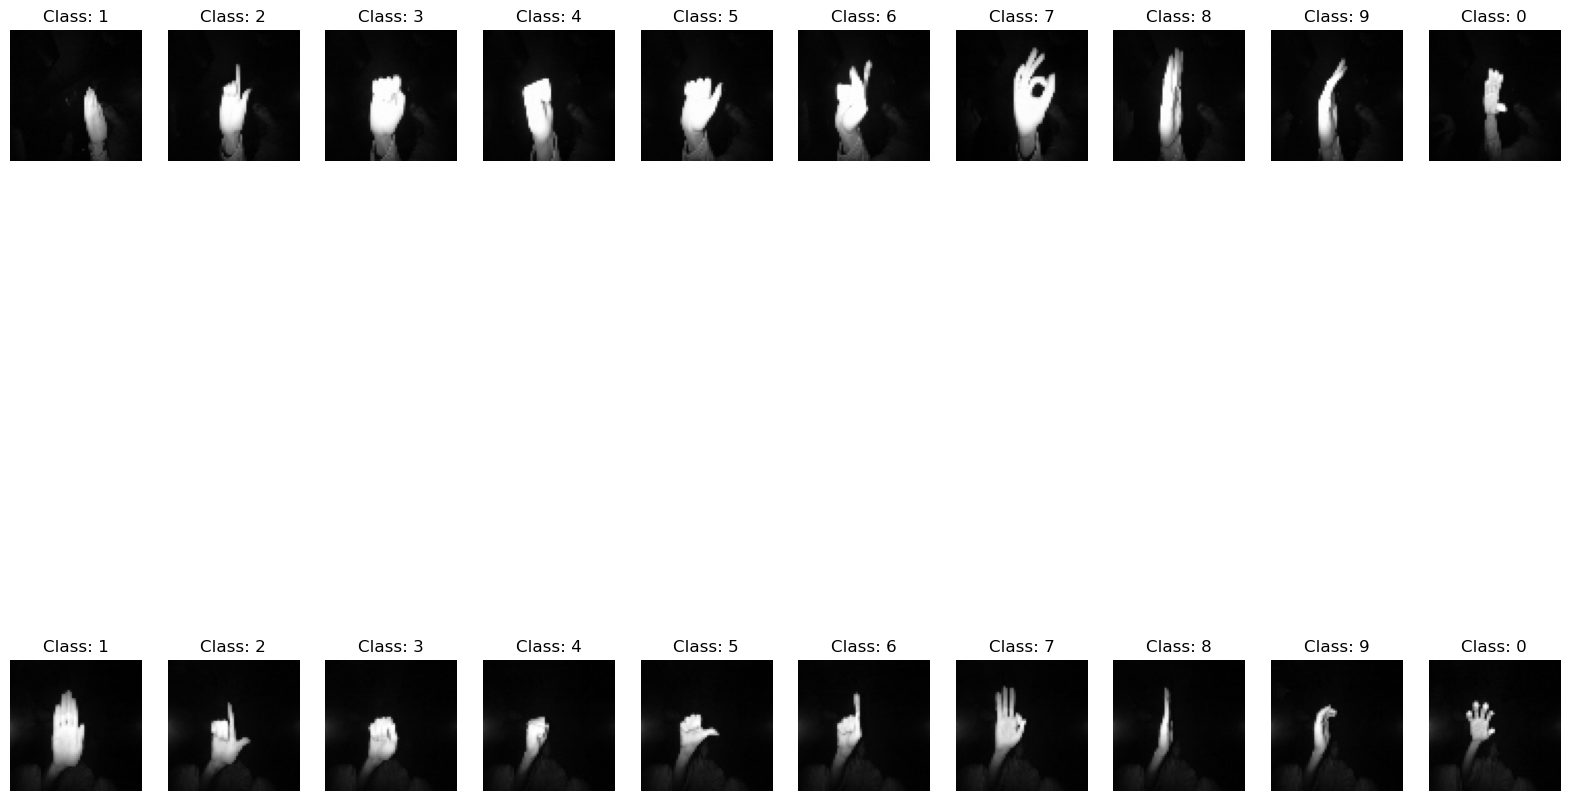

In [48]:
# Display first 10 images with labels
plt.figure(figsize=(20, 15))
for i in range(20):  # ✅ Just change this number to show more images
    plt.subplot(2, 10, i + 1)  # ✅ Adjust layout (1 row, 10 columns)
    plt.imshow(training_data[i*200][0].reshape(64, 64), cmap='gray')
    plt.title(f"Class: {training_data[i*200][1]}")
    plt.axis('off')

plt.show()


# Shuffling the data 

In [49]:
random.shuffle(training_data)

## Prepare X and y

## for X

In [50]:
X = np.array([feature for feature, label in training_data]).reshape(-1, 64, 64, 1)  # Reshape for CNN
X = X / 255.0  # Normalize

## for y

In [51]:
y = np.array([label for _, label in training_data])  # same as [label for features, label in training_data]

### Train-test split

In [52]:
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {train_images.shape}, Test shape: {test_images.shape}")

Train shape: (16001, 64, 64, 1), Test shape: (4001, 64, 64, 1)


# Starting to train the CNN model 

In [53]:
model = models.Sequential([
    layers.Flatten(input_shape=(64, 64, 1)),  # Match the actual image size
    layers.Dense(64),
    layers.LeakyReLU(alpha=0.1),
    layers.Dense(32),
    layers.LeakyReLU(alpha=0.1),
    layers.Dense(16),
    layers.LeakyReLU(alpha=0.1),
    layers.Dense(10, activation='softmax')
])

# Summarize the model architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,986 (1.01 MB)

 Trainable params: 264,986 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use categorical cross-entropy for classification
              metrics=['accuracy'])


In [55]:
# Train the model
HGR = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1706 - loss: 2.2060 - val_accuracy: 0.4324 - val_loss: 1.5201
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5110 - loss: 1.3737 - val_accuracy: 0.5804 - val_loss: 1.1613
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6107 - loss: 1.0896 - val_accuracy: 0.6896 - val_loss: 0.9317
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6760 - loss: 0.9173 - val_accuracy: 0.7306 - val_loss: 0.7950
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7404 - loss: 0.7746 - val_accuracy: 0.7878 - val_loss: 0.7012
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8056 - loss: 0.6545 - val_accuracy: 0.8278 - val_loss: 0.5600
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8425 - loss: 0.5378 - val_accuracy: 0.8838 - val_loss: 0.4674
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8821 - loss: 0.4563 - val_accuracy: 0.

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 0.0110
Test accuracy: 99.75%


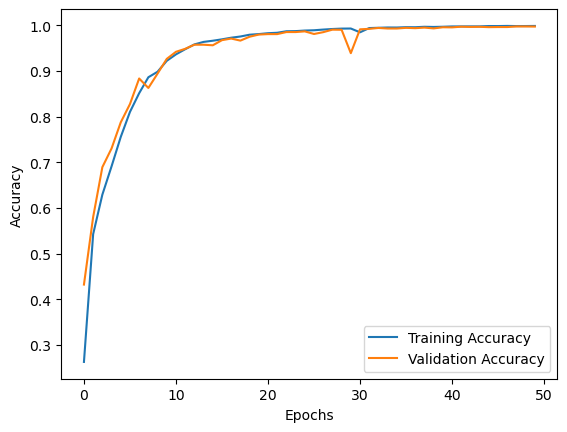

In [56]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Plot accuracy and loss curves
plt.plot(HGR.history['accuracy'], label='Training Accuracy')
plt.plot(HGR.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted Label: 3
Actual Label: 3


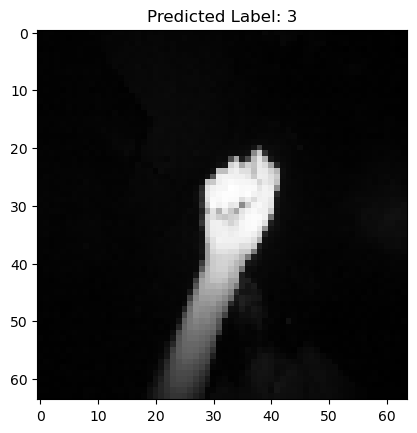

Predicted Label: 6
Actual Label: 6


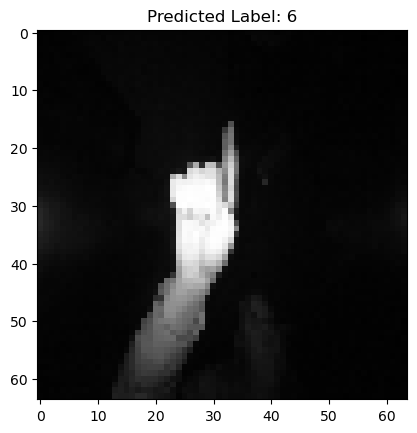

Predicted Label: 3
Actual Label: 3


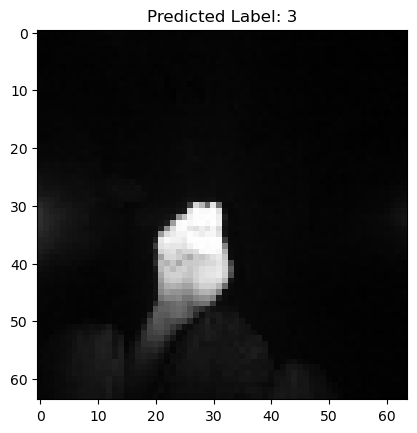

Predicted Label: 3
Actual Label: 3


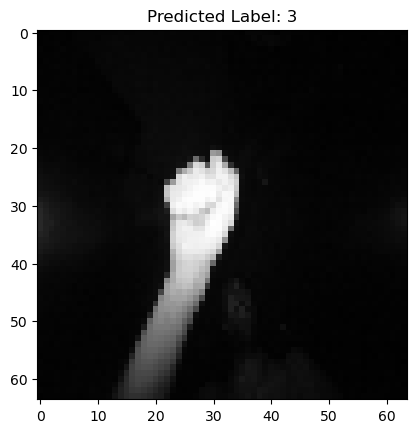

Predicted Label: 9
Actual Label: 9


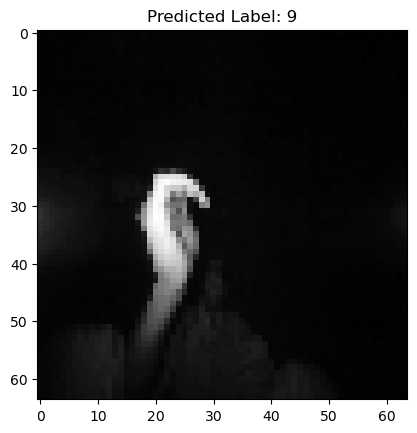

Predicted Label: 2
Actual Label: 2


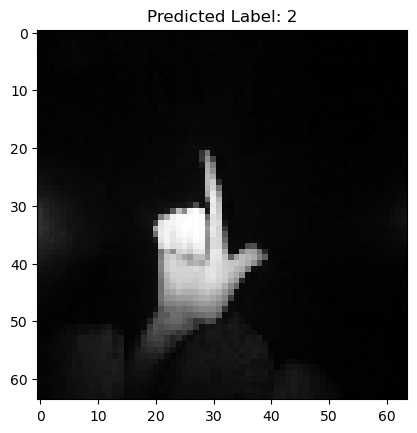

Predicted Label: 2
Actual Label: 2


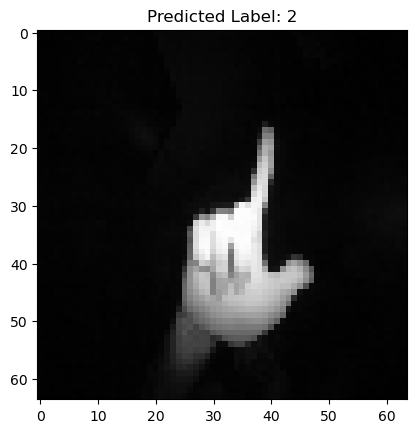

Predicted Label: 8
Actual Label: 8


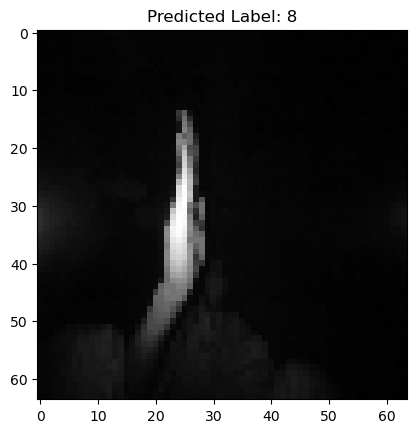

Predicted Label: 0
Actual Label: 0


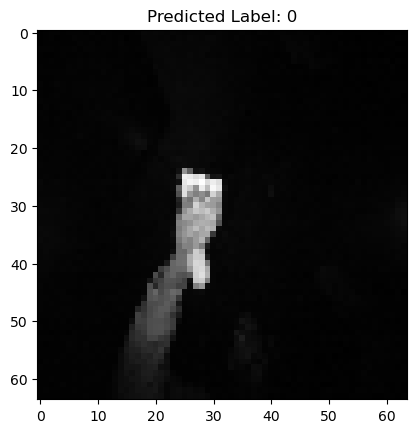

Predicted Label: 0
Actual Label: 0


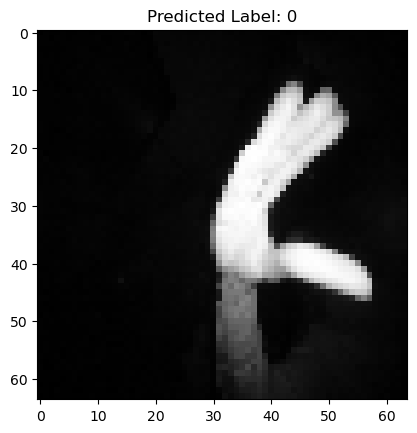

Predicted Label: 1
Actual Label: 1


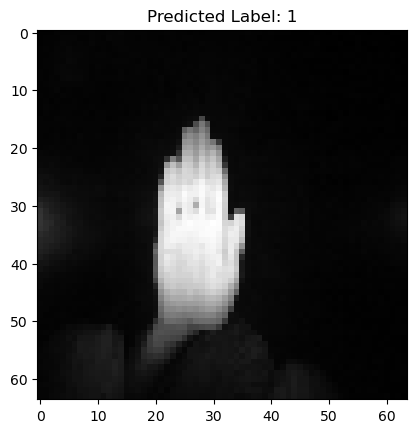

Predicted Label: 8
Actual Label: 8


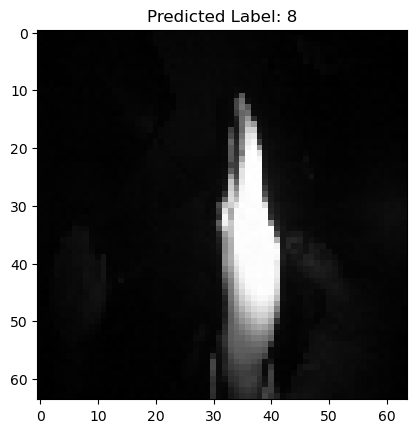

Predicted Label: 1
Actual Label: 1


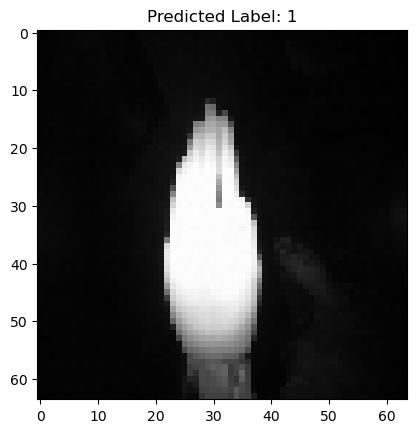

Predicted Label: 9
Actual Label: 9


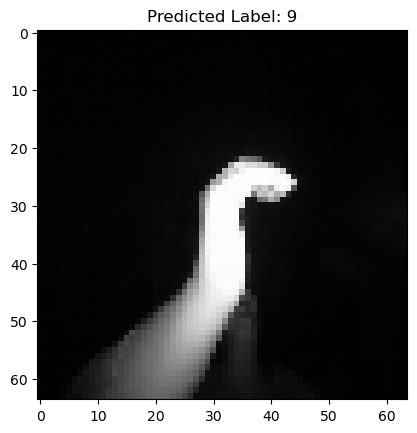

Predicted Label: 2
Actual Label: 2


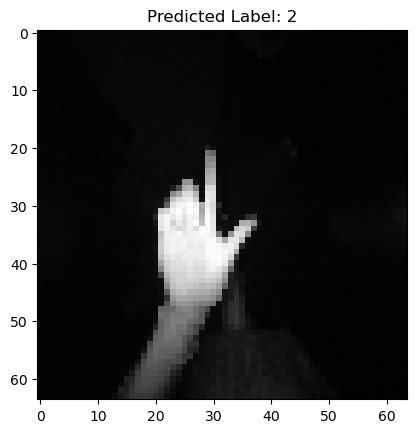

Predicted Label: 7
Actual Label: 7


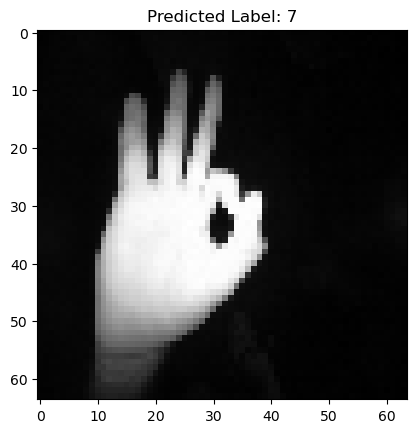

Predicted Label: 0
Actual Label: 0


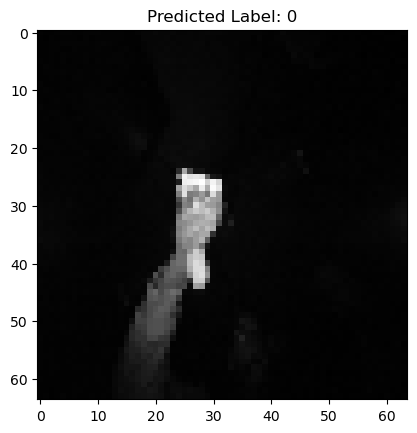

Predicted Label: 5
Actual Label: 5


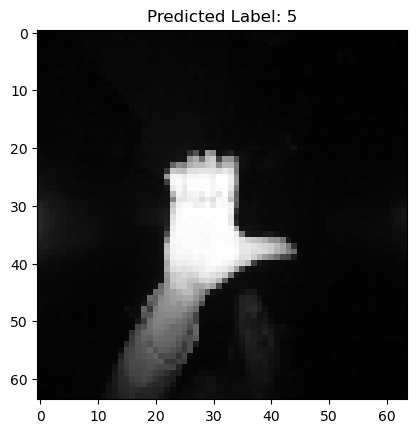

Predicted Label: 3
Actual Label: 3


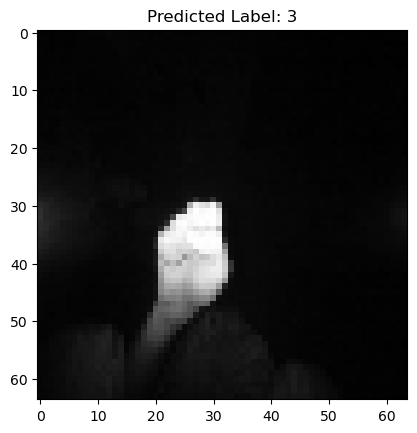

Predicted Label: 1
Actual Label: 1


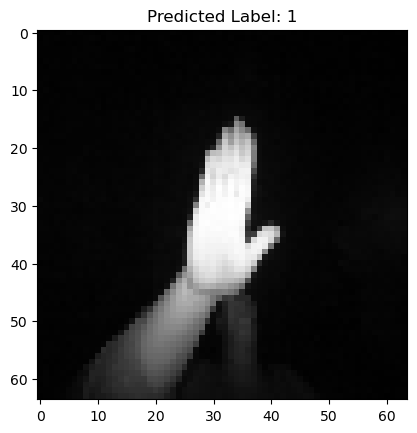

Predicted Label: 7
Actual Label: 7


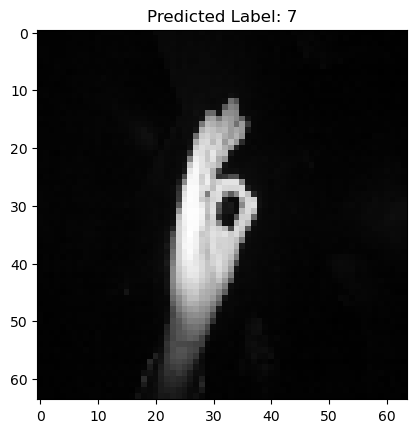

Predicted Label: 9
Actual Label: 9


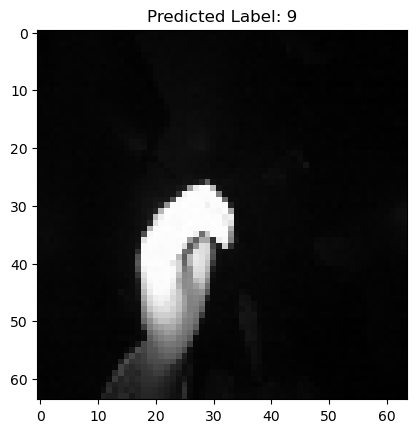

Predicted Label: 1
Actual Label: 1


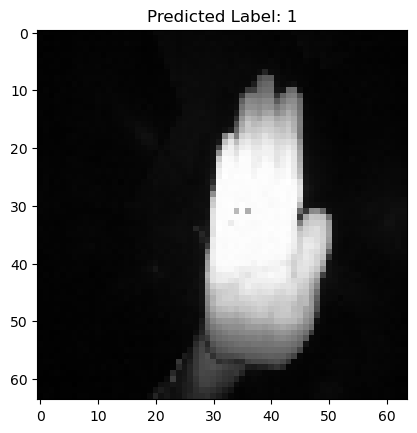

Predicted Label: 5
Actual Label: 5


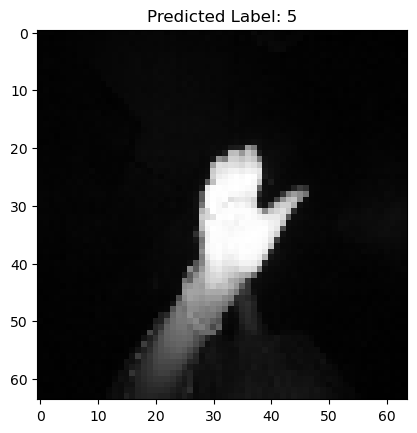

Predicted Label: 0
Actual Label: 0


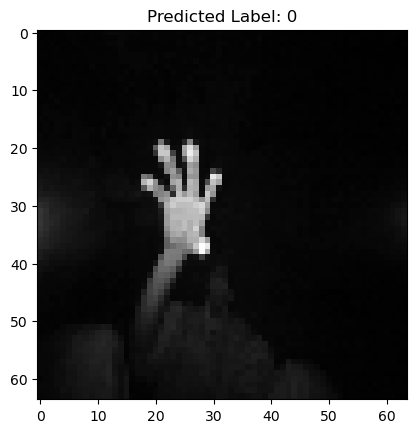

Predicted Label: 5
Actual Label: 5


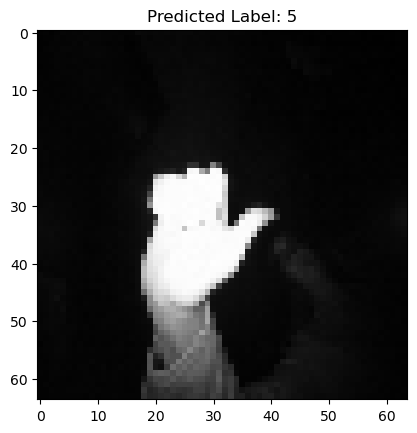

Predicted Label: 4
Actual Label: 4


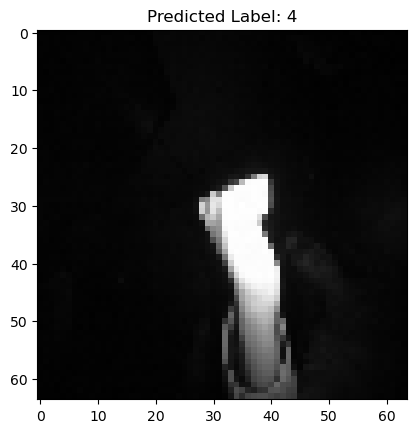

Predicted Label: 6
Actual Label: 6


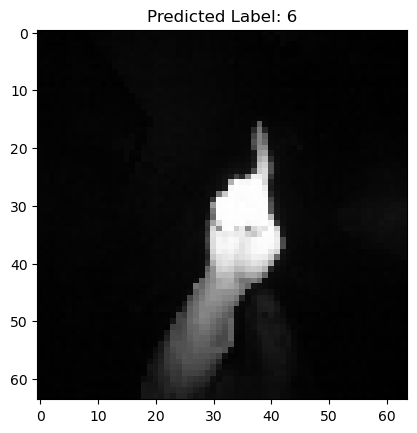

Predicted Label: 1
Actual Label: 1


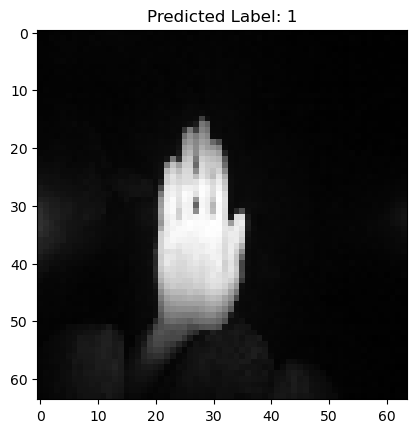

Predicted Label: 5
Actual Label: 5


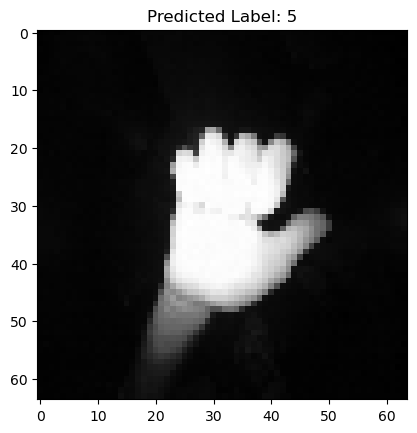

Predicted Label: 1
Actual Label: 1


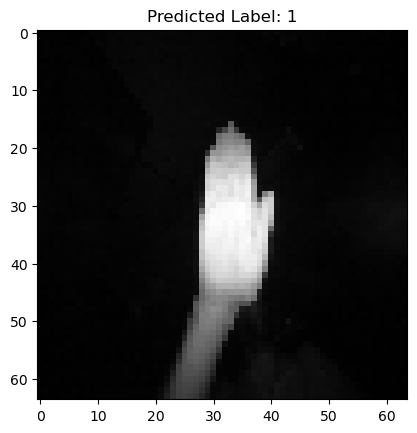

Predicted Label: 6
Actual Label: 6


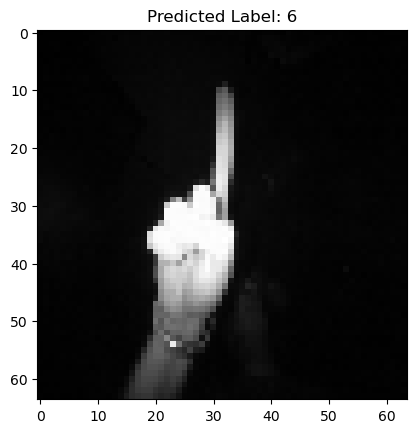

Predicted Label: 2
Actual Label: 2


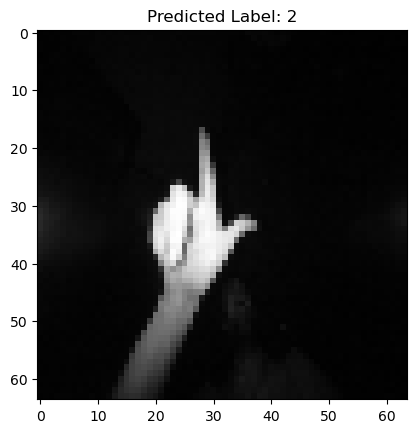

Predicted Label: 9
Actual Label: 9


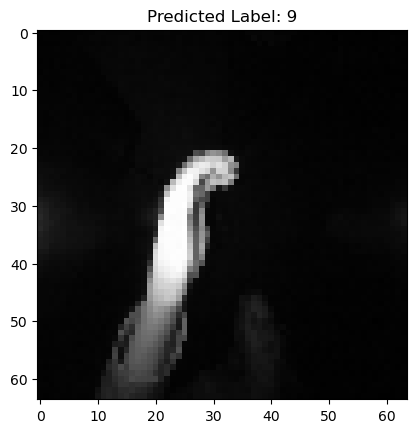

Predicted Label: 2
Actual Label: 2


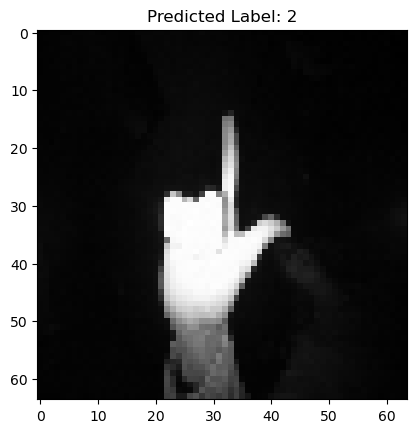

Predicted Label: 1
Actual Label: 1


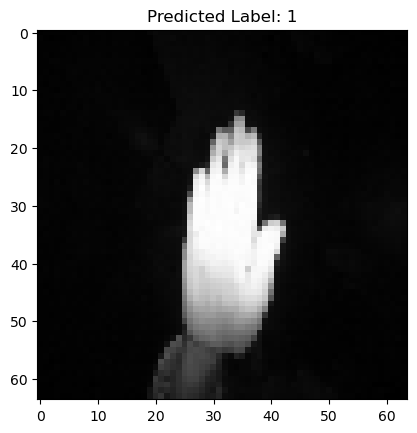

Predicted Label: 8
Actual Label: 8


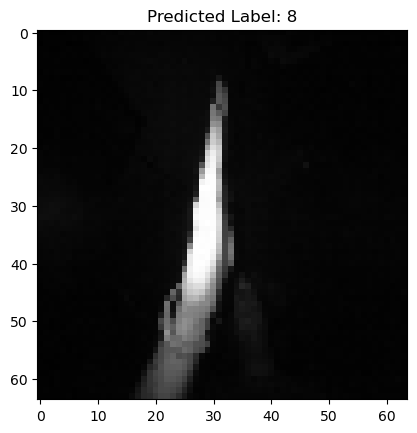

Predicted Label: 7
Actual Label: 7


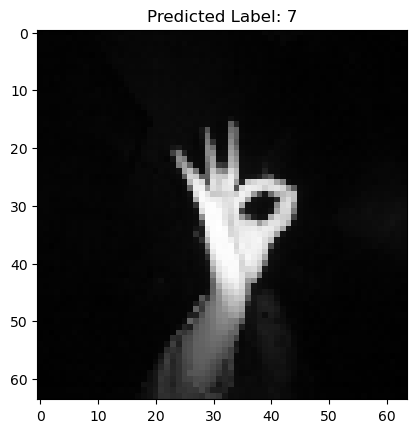

Predicted Label: 8
Actual Label: 8


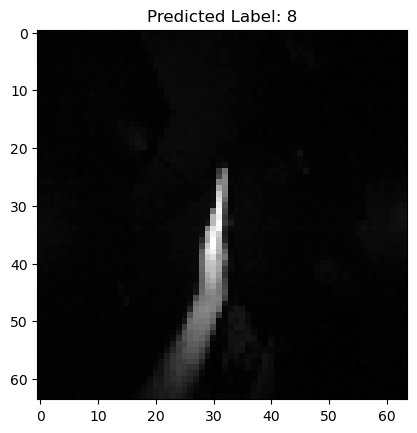

Predicted Label: 3
Actual Label: 3


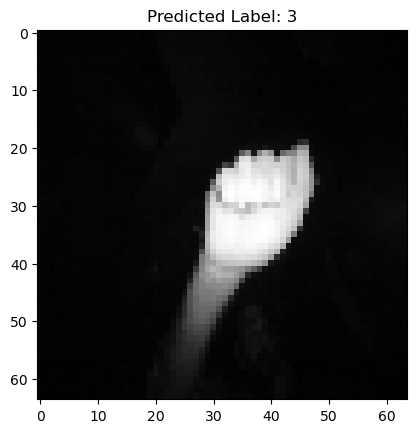

Predicted Label: 5
Actual Label: 5


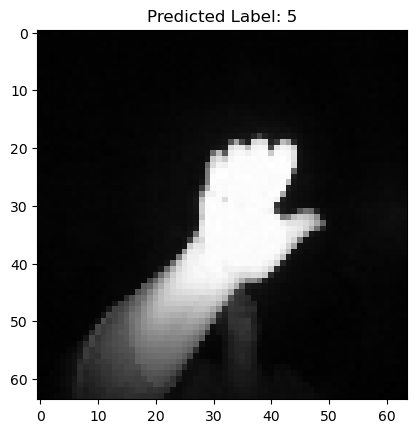

Predicted Label: 7
Actual Label: 7


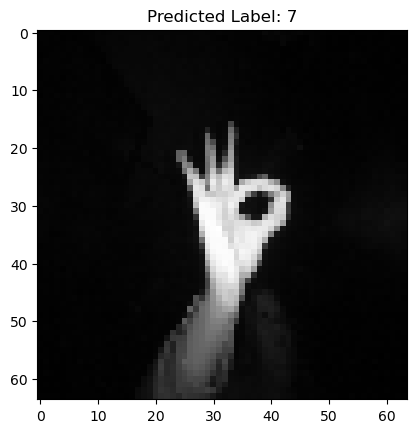

Predicted Label: 8
Actual Label: 8


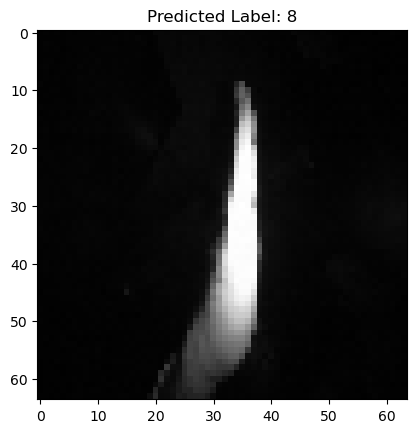

Predicted Label: 4
Actual Label: 4


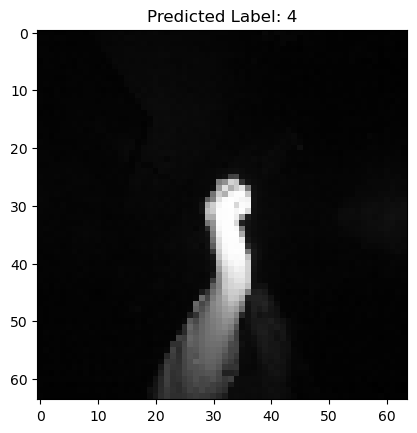

Predicted Label: 2
Actual Label: 2


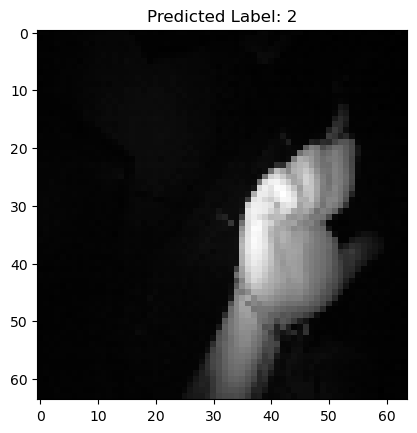

Predicted Label: 6
Actual Label: 6


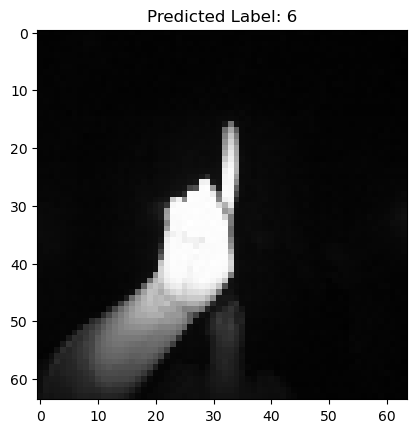

Predicted Label: 6
Actual Label: 6


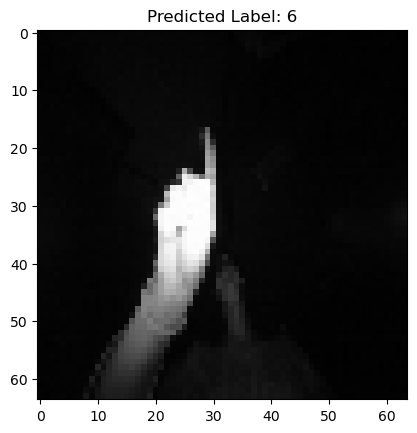

Predicted Label: 6
Actual Label: 6


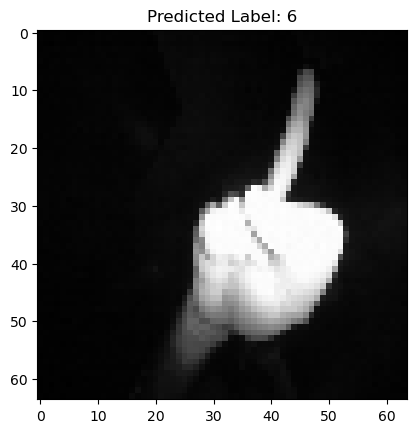

Predicted Label: 9
Actual Label: 9


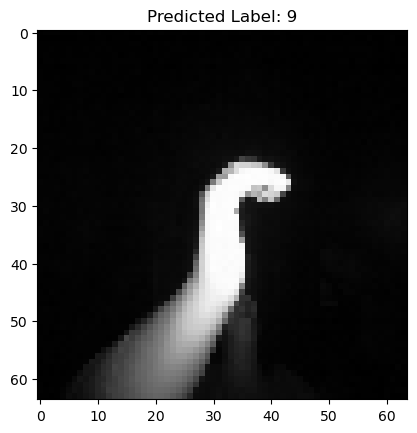

Predicted Label: 4
Actual Label: 4


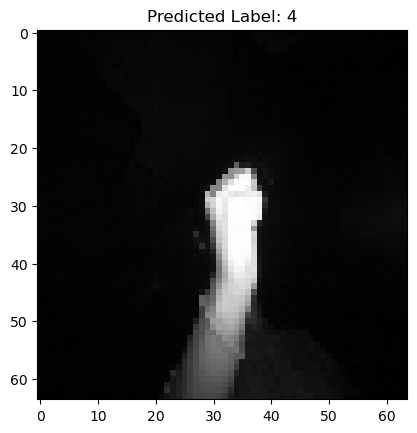

Predicted Label: 6
Actual Label: 6


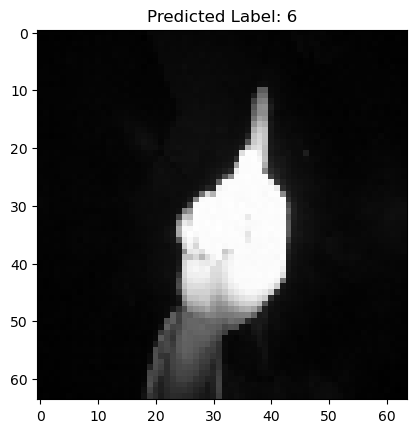

Predicted Label: 8
Actual Label: 8


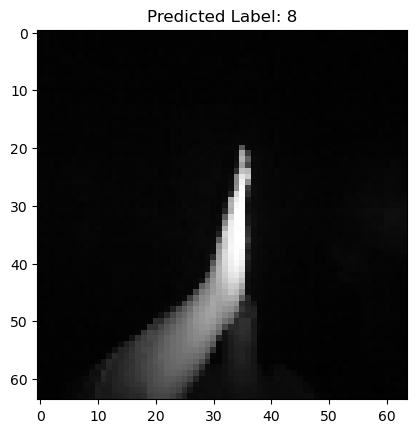

Predicted Label: 3
Actual Label: 3


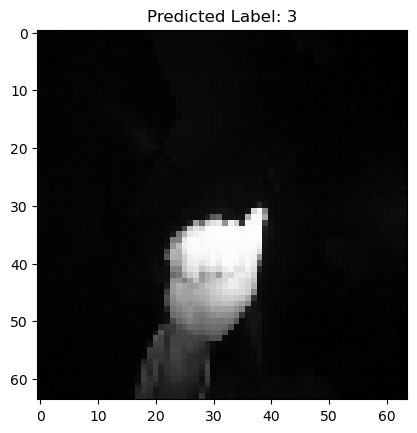

Predicted Label: 8
Actual Label: 8


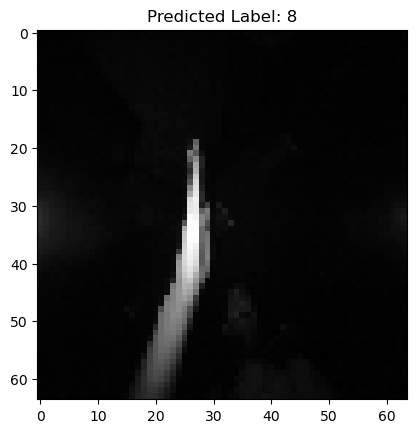

Predicted Label: 7
Actual Label: 7


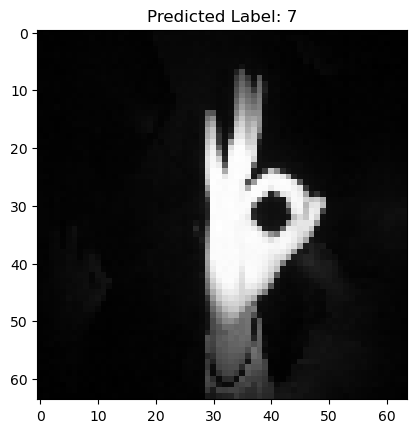

Predicted Label: 4
Actual Label: 4


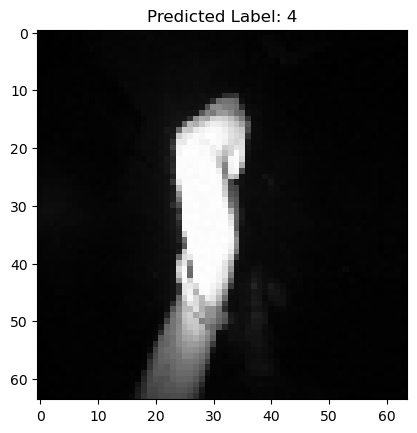

Predicted Label: 9
Actual Label: 9


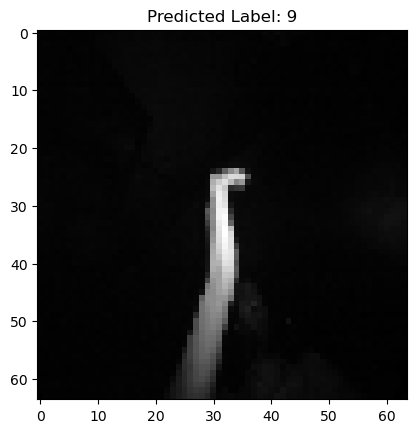

Predicted Label: 8
Actual Label: 8


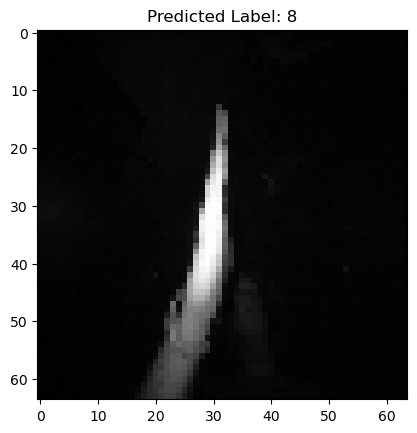

Predicted Label: 2
Actual Label: 2


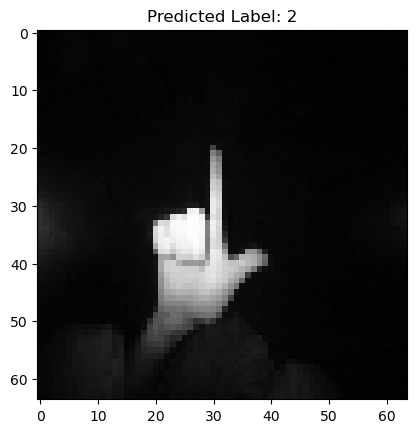

Predicted Label: 8
Actual Label: 8


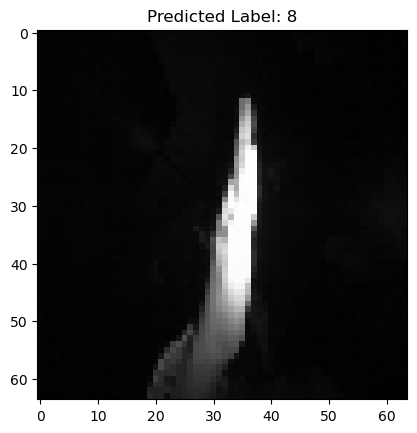

In [57]:
# Make predictions
predictions = model.predict(test_images)

i = 30
for i in range(60):
    # Show the prediction for the first image
    print(f"Predicted Label: {np.argmax(predictions[i])}")
    print(f"Actual Label: {test_labels[i]}")

# Show the first image and its predicted label
    plt.imshow(test_images[i].reshape(64, 64), cmap='gray')
    plt.title(f"Predicted Label: {np.argmax(predictions[i])}")
    plt.show()


In [58]:
# Save the model
import joblib 

joblib.dump(model, 'gesture_recognition_model.pkl')
# Load the model
loaded_model = joblib.load('gesture_recognition_model.pkl')
# Evaluate the loaded model
loaded_model.evaluate(test_images, test_labels)

126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9977 - loss: 0.0110


[0.013696652837097645, 0.9975005984306335]

In [ ]:
def predict_hand_gesture(model, image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"❌ Image not found at: {image_path}")

    # Resize to 64x64
    img = cv2.resize(img, (64, 64))

    # Normalize pixel values
    img = img / 255.0

    # Reshape to match training input shape: (1, 64, 64, 1)
    img = img.reshape(1, 64, 64, 1)

    # Predict
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    gesture_names = ['','Palm 01', 'I 02', 'Fist 03', 'Fist Moved 04', 'Thumb 05', 
                     'Index 06', 'Ok 07', 'Palm Moved 08', 'C 09', 'Down 10']

    # Visualize
    plt.imshow(img.reshape(64, 64), cmap='gray')
    plt.title(f"Predicted: {gesture_names[predicted_class]}")
    plt.axis("off")
    plt.show()

    print(f"✅ Predicted class: {predicted_class} ({gesture_names[predicted_class]})")
    print(f"Confidence scores: {prediction[0]}")
    return predicted_class, prediction[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


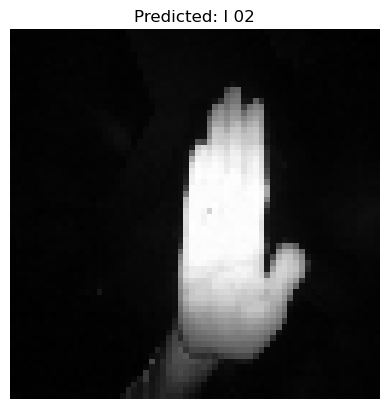

✅ Predicted class: 1 (I 02)
Confidence scores: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


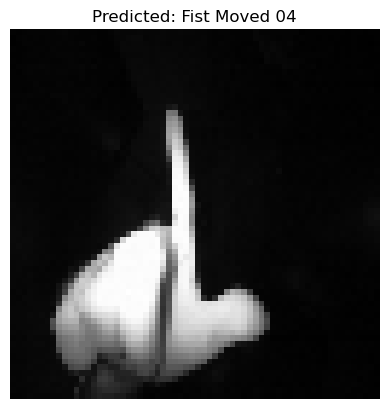

✅ Predicted class: 3 (Fist Moved 04)
Confidence scores: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


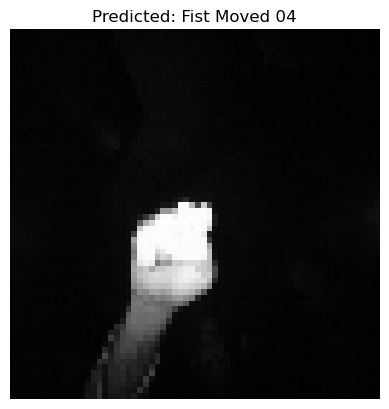

✅ Predicted class: 3 (Fist Moved 04)
Confidence scores: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


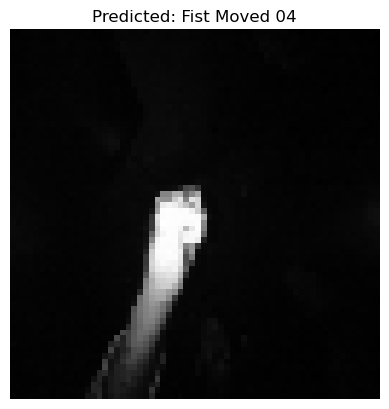

✅ Predicted class: 3 (Fist Moved 04)
Confidence scores: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


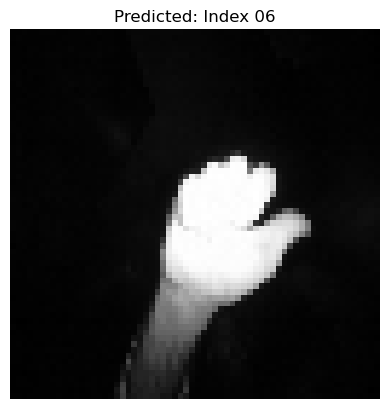

✅ Predicted class: 5 (Index 06)
Confidence scores: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


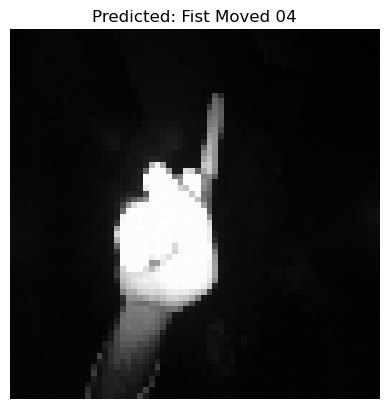

✅ Predicted class: 3 (Fist Moved 04)
Confidence scores: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


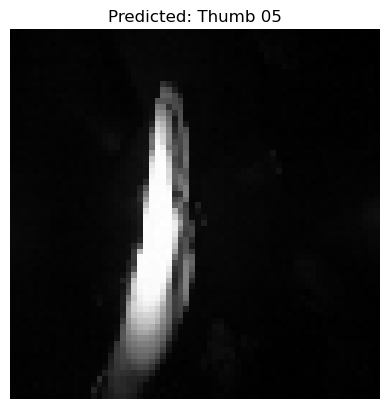

✅ Predicted class: 4 (Thumb 05)
Confidence scores: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


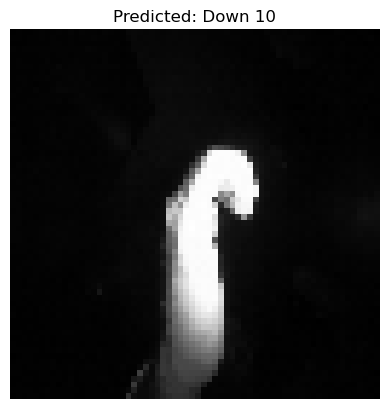

✅ Predicted class: 9 (Down 10)
Confidence scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


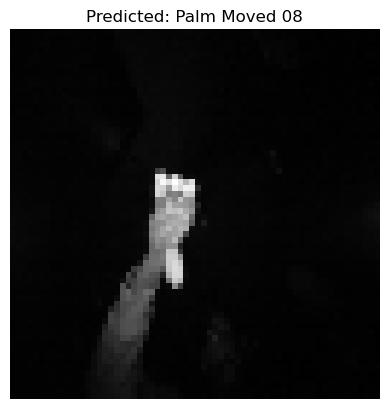

✅ Predicted class: 7 (Palm Moved 08)
Confidence scores: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


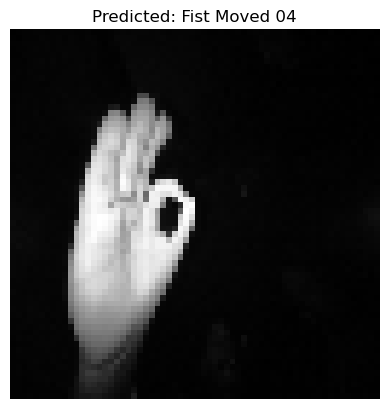

✅ Predicted class: 3 (Fist Moved 04)
Confidence scores: [0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 2.178755e-11 0.000000e+00 0.000000e+00]


(3,
 array([0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 2.178755e-11,
        0.000000e+00, 0.000000e+00], dtype=float32))

In [71]:
predict_hand_gesture(model, "test_images/0.png")
predict_hand_gesture(model, "test_images/1.png")
predict_hand_gesture(model, "test_images/2.png")
predict_hand_gesture(model, "test_images/3.png")
predict_hand_gesture(model, "test_images/4.png")
predict_hand_gesture(model, "test_images/5.png")
predict_hand_gesture(model, "test_images/6.png")
predict_hand_gesture(model, "test_images/7.png")
predict_hand_gesture(model, "test_images/8.png")
predict_hand_gesture(model, "test_images/9.png")

